In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Prepare Data

In [220]:
hardware_usage_7b = pd.read_feather('data/llama2-7b/measurement_logs-7b-2024-04-13.feather')
hardware_usage_13b = pd.read_feather('data/llama2-13b/measurement_logs-13b-2024-04-15.feather')
hardware_usage_70b = pd.read_feather('data/llama2-70b/measurement_logs-70b-2024-04-13.feather')

In [221]:
hardware_usage_7b

,CPU Usage (%),Memory Usage (%),Swap Usage (%),GPU Usage (%),Network Sent (bytes),Network Received (bytes)
0,0.0,21.8,0.1,0,3063023630,69761601848
1,0.6,21.8,0.1,0,3063037664,69761624300
2,0.7,22.6,0.1,0,3063039484,69761635033
3,14.6,19.8,0.1,78,3063154342,69761712987
4,13.1,19.8,0.1,100,3063223226,69761790604
...,...,...,...,...,...,...
21567,12.8,18.1,0.0,100,5164107229,72352968300
21568,12.9,18.1,0.0,74,5164255453,72353125820
21569,12.9,18.1,0.0,100,5164274530,72353153937
21570,4.0,17.7,0.0,0,5164327017,72353214864


In [222]:
hardware_usage_13b

,CPU Usage (%),Memory Usage (%),Swap Usage (%),GPU Usage (%),Network Sent (bytes),Network Received (bytes)
0,0.0,19.1,0.0,0,5187836834,72379912106
1,0.4,19.1,0.0,0,5187935261,72379973881
2,0.6,20.2,0.0,0,5187937413,72379996759
3,4.8,19.9,0.0,0,5187960025,72380027888
4,1.6,19.9,0.1,0,5187961799,72380039824
...,...,...,...,...,...,...
18469,12.8,17.7,0.1,61,7309096791,74692888118
18470,12.7,17.7,0.1,100,7309182459,74692982486
18471,12.7,17.7,0.1,100,7309332096,74693139983
18472,12.4,17.3,0.1,64,7309468313,74693284720


In [223]:
hardware_usage_70b

,CPU Usage (%),Memory Usage (%),Swap Usage (%),GPU Usage (%),Network Sent (bytes),Network Received (bytes)
0,0.0,2.9,0.0,0,1434241688,70144478487
1,0.1,2.9,0.0,0,1434246679,70144483274
2,0.2,3.0,0.0,0,1434248626,70144485145
3,6.4,3.0,0.0,100,1434286277,70144522762
4,6.4,3.0,0.0,86,1434353869,70144590150
...,...,...,...,...,...,...
10515,6.3,2.9,0.0,100,1960677480,70671831680
10516,6.3,2.9,0.0,100,1960777060,70671931260
10517,6.3,2.9,0.0,100,1960811707,70671965907
10518,6.3,2.9,0.0,100,1960844973,70671999173


### Combine Data

In [224]:
cpu_usage = pd.DataFrame()
cpu_usage['7b'] = hardware_usage_7b['CPU Usage (%)']
cpu_usage['13b'] = hardware_usage_13b['CPU Usage (%)']
cpu_usage['70b'] = hardware_usage_70b['CPU Usage (%)']

gpu_usage = pd.DataFrame()
gpu_usage['7b'] = hardware_usage_7b['GPU Usage (%)']
gpu_usage['13b'] = hardware_usage_13b['GPU Usage (%)']
gpu_usage['70b'] = hardware_usage_70b['GPU Usage (%)']

memory_usage = pd.DataFrame()
memory_usage['7b'] = hardware_usage_7b['Memory Usage (%)']
memory_usage['13b'] = hardware_usage_13b['Memory Usage (%)']
memory_usage['70b'] = hardware_usage_70b['Memory Usage (%)']

swap_usage = pd.DataFrame()
swap_usage['7b'] = hardware_usage_7b['Swap Usage (%)']
swap_usage['13b'] = hardware_usage_13b['Swap Usage (%)']
swap_usage['70b'] = hardware_usage_70b['Swap Usage (%)']

network_usage = pd.DataFrame()
network_usage['7b_sent'] = hardware_usage_7b['Network Sent (bytes)']
network_usage['7b_received'] = hardware_usage_7b['Network Received (bytes)']
network_usage['13b_sent'] = hardware_usage_13b['Network Sent (bytes)']
network_usage['13b_received'] = hardware_usage_13b['Network Received (bytes)']
network_usage['70b_sent'] = hardware_usage_70b['Network Sent (bytes)']
network_usage['70b_received'] = hardware_usage_70b['Network Received (bytes)']

## Analyse Data

### GPU

<Axes: >

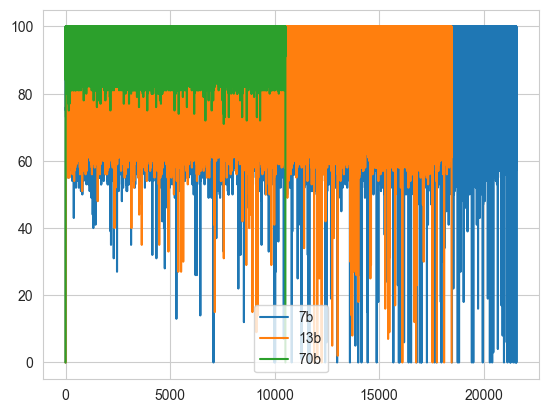

In [225]:
gpu_usage.plot()

In [226]:
gpu_usage.describe()

,7b,13b,70b
count,21572.000000,18474.000000,10520.000000
mean,83.792741,91.726914,97.793156
std,15.375437,14.617380,5.768747
min,0.000000,0.000000,0.000000
25%,75.000000,89.000000,100.000000
50%,79.000000,100.000000,100.000000
75%,100.000000,100.000000,100.000000
max,100.000000,100.000000,100.000000


<Axes: >

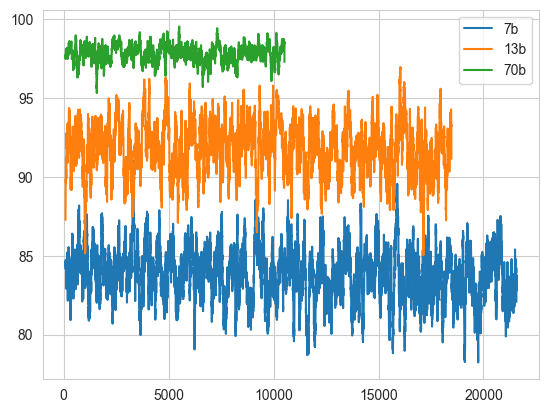

In [227]:
# downsample to half the frequency using a rolling mean
gpu_usage_down = gpu_usage[10:].rolling(80).mean()

gpu_usage_down.plot()

In [228]:
gpu_usage_down = gpu_usage[10:].rolling(80).mean()

gpu_7 = pd.DataFrame(gpu_usage_down['7b'].dropna().reset_index(drop=True))
gpu_13 = pd.DataFrame(gpu_usage_down['13b'].dropna().reset_index(drop=True))
gpu_70 = pd.DataFrame(gpu_usage_down['70b'].dropna().reset_index(drop=True))

gpu_7.index = gpu_7.index / gpu_7.index.max() * 100
gpu_13.index = gpu_13.index / gpu_13.index.max() * 100
gpu_70.index = gpu_70.index / gpu_70.index.max() * 100

gpu_7['mean'] = gpu_7['7b'].mean()
gpu_13['mean'] = gpu_13['13b'].mean()
gpu_70['mean'] = gpu_70['70b'].mean()

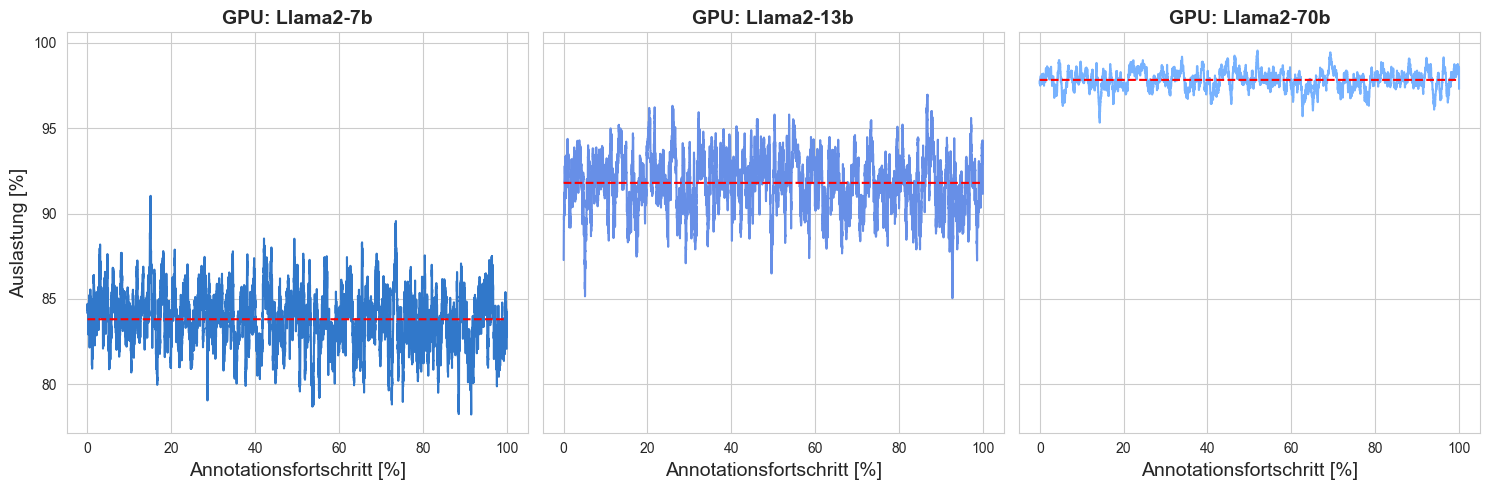

In [229]:
# Set pastel colors
colors = ['#3178ca', '#678fe7', '#77b2fe']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot for 7b
gpu_7['7b'].plot(ax=axes[0], color=colors[0])
gpu_7['mean'].plot(ax=axes[0], color='red', linestyle='--', label='Mean')
axes[0].set_title('GPU: Llama2-7b', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Auslastung [%]', fontsize=14)
axes[0].set_xlabel('Annotationsfortschritt [%]', fontsize=14)
axes[0].tick_params(axis='both', which='major', labelsize=10)

# Plot for 13b
gpu_13['13b'].plot(ax=axes[1], color=colors[1])
gpu_13['mean'].plot(ax=axes[1], color='red', linestyle='--', label='Mean')
axes[1].set_title('GPU: Llama2-13b', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Annotationsfortschritt [%]', fontsize=14)
axes[1].tick_params(axis='both', which='major', labelsize=10)

# Plot for 70b
gpu_70['70b'].plot(ax=axes[2], color=colors[2])
gpu_70['mean'].plot(ax=axes[2], color='red', linestyle='--', label='Mean')
axes[2].set_title('GPU: Llama2-70b', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Annotationsfortschritt [%]', fontsize=14)
axes[2].tick_params(axis='both', which='major', labelsize=10)

# Adjust layout
plt.tight_layout()

plt.show()

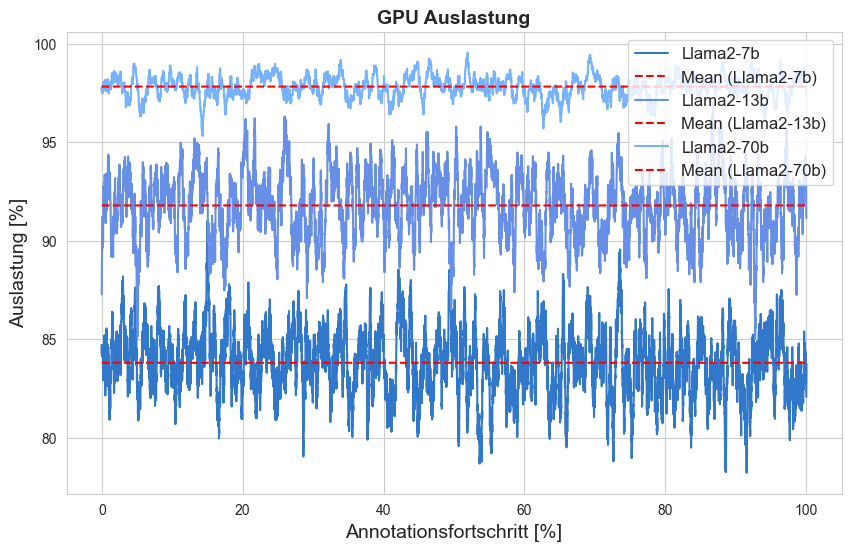

In [230]:
import matplotlib.pyplot as plt

# Set pastel colors
colors = ['#3178ca', '#678fe7', '#77b2fe']

# Create a single plot
plt.figure(figsize=(10, 6))

# Plot for 7b
gpu_7['7b'].plot(color=colors[0], label='Llama2-7b')
gpu_7['mean'].plot(color='red', linestyle='--', label='Mean (Llama2-7b)')

# Plot for 13b
gpu_13['13b'].plot(color=colors[1], label='Llama2-13b')
gpu_13['mean'].plot(color='red', linestyle='--', label='Mean (Llama2-13b)')

# Plot for 70b
gpu_70['70b'].plot(color=colors[2], label='Llama2-70b')
gpu_70['mean'].plot(color='red', linestyle='--', label='Mean (Llama2-70b)')

# Set titles and labels
plt.title('GPU Auslastung', fontsize=14, fontweight='bold')
plt.xlabel('Annotationsfortschritt [%]', fontsize=14)
plt.ylabel('Auslastung [%]', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(fontsize=12)

# Show plot
plt.show()


### CPU

In [231]:
cpu_usage_down = cpu_usage.copy()
# cpu_usage_down = cpu_usage[10:].rolling(80).mean()

cpu_7 = pd.DataFrame(cpu_usage_down['7b'].dropna().reset_index(drop=True))
cpu_13 = pd.DataFrame(cpu_usage_down['13b'].dropna().reset_index(drop=True))
cpu_70 = pd.DataFrame(cpu_usage_down['70b'].dropna().reset_index(drop=True))

cpu_7['7b'] = cpu_7['7b']/2
cpu_13['13b'] = cpu_13['13b']/2

cpu_7.index = cpu_7.index / cpu_7.index.max() * 100
cpu_13.index = cpu_13.index / cpu_13.index.max() * 100
cpu_70.index = cpu_70.index / cpu_70.index.max() * 100

# cpu_7['mean'] = cpu_7['7b'].mean()
# cpu_13['mean'] = cpu_13['13b'].mean()
# cpu_70['mean'] = cpu_70['70b'].mean()

In [232]:
print(cpu_7['7b'].mean())
print(cpu_13['13b'].mean())
print(cpu_70['70b'].mean())

6.476812534767293
6.396779257334633
6.305161596958174


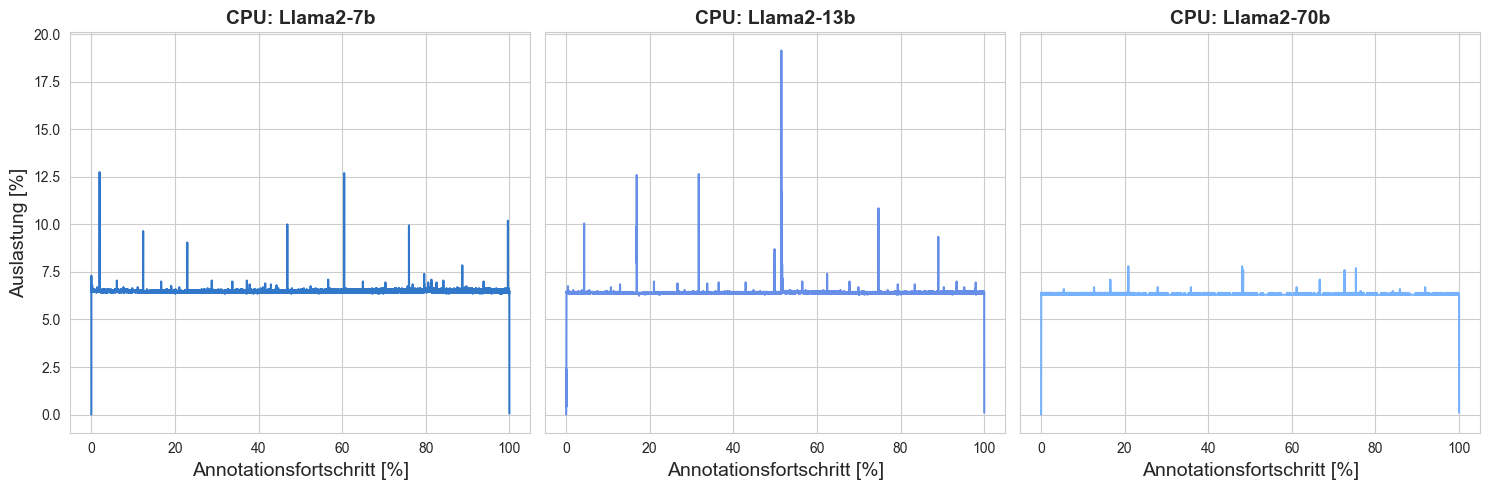

In [233]:
# Set pastel colors
colors = ['#3178ca', '#678fe7', '#77b2fe']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot for 7b
cpu_7['7b'].plot(ax=axes[0], color=colors[0])
# gpu_7['mean'].plot(ax=axes[0], color='red', linestyle='--', label='Mean')
axes[0].set_title('CPU: Llama2-7b', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Auslastung [%]', fontsize=14)
axes[0].set_xlabel('Annotationsfortschritt [%]', fontsize=14)
axes[0].tick_params(axis='both', which='major', labelsize=10)

# Plot for 13b
cpu_13['13b'].plot(ax=axes[1], color=colors[1])
# gpu_13['mean'].plot(ax=axes[1], color='red', linestyle='--', label='Mean')
axes[1].set_title('CPU: Llama2-13b', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Annotationsfortschritt [%]', fontsize=14)
axes[1].tick_params(axis='both', which='major', labelsize=10)

# Plot for 70b
cpu_70['70b'].plot(ax=axes[2], color=colors[2])
# gpu_70['mean'].plot(ax=axes[2], color='red', linestyle='--', label='Mean')
axes[2].set_title('CPU: Llama2-70b', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Annotationsfortschritt [%]', fontsize=14)
axes[2].tick_params(axis='both', which='major', labelsize=10)

# Adjust layout
plt.tight_layout()

plt.show()

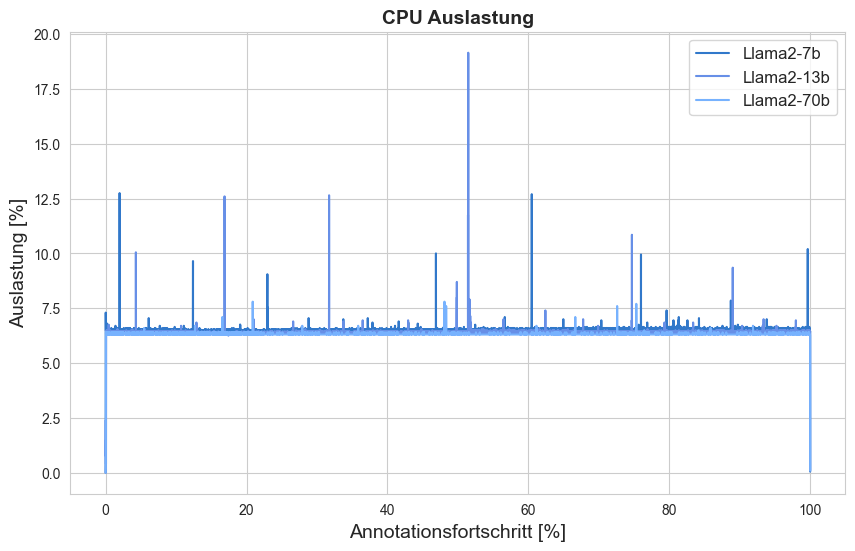

In [234]:
import matplotlib.pyplot as plt

# Set pastel colors
colors = ['#3178ca', '#678fe7', '#77b2fe']

# Create a single plot
plt.figure(figsize=(10, 6))

# Plot for 7b
cpu_7['7b'].plot(color=colors[0], label='Llama2-7b')

# Plot for 13b
cpu_13['13b'].plot(color=colors[1], label='Llama2-13b')

# Plot for 70b
cpu_70['70b'].plot(color=colors[2], label='Llama2-70b')

# Set titles and labels
plt.title('CPU Auslastung', fontsize=14, fontweight='bold')
plt.xlabel('Annotationsfortschritt [%]', fontsize=14)
plt.ylabel('Auslastung [%]', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(fontsize=12)

# Show plot
plt.show()


### Memory

In [235]:
memory_usage_down = memory_usage.copy()
# cpu_usage_down = cpu_usage[10:].rolling(80).mean()

memory_7 = pd.DataFrame(memory_usage_down['7b'].dropna().reset_index(drop=True))
memory_13 = pd.DataFrame(memory_usage_down['13b'].dropna().reset_index(drop=True))
memory_70 = pd.DataFrame(memory_usage_down['70b'].dropna().reset_index(drop=True))

memory_7['7b'] = memory_7['7b']/7
memory_13['13b'] = memory_13['13b']/7+0.217

memory_7['7b'] = memory_7['7b'].rolling(20).mean()
memory_13['13b'] = memory_13['13b'].rolling(20).mean()

memory_7.index = memory_7.index / memory_7.index.max() * 100
memory_13.index = memory_13.index / memory_13.index.max() * 100
memory_70.index = memory_70.index / memory_70.index.max() * 100

# memory_7['mean'] = memory_7['7b'].mean()
# memory_13['mean'] = memory_13['13b'].mean()
# memory_70['mean'] = memory_70['70b'].mean()

In [236]:
print(memory_7['7b'].mean())
print(memory_13['13b'].mean())
print(memory_70['70b'].mean())

2.7182635827958985
2.7813141231567133
2.870979087452471


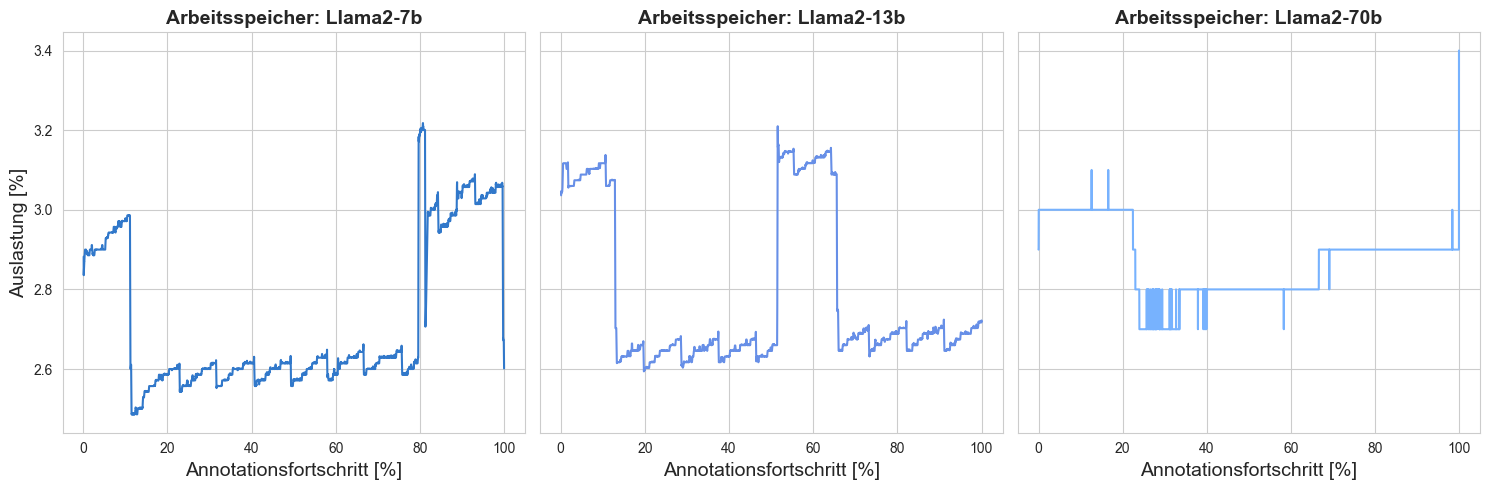

In [237]:
# Set pastel colors
colors = ['#3178ca', '#678fe7', '#77b2fe']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot for 7b
memory_7['7b'].plot(ax=axes[0], color=colors[0])
# gpu_7['mean'].plot(ax=axes[0], color='red', linestyle='--', label='Mean')
axes[0].set_title('Arbeitsspeicher: Llama2-7b', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Auslastung [%]', fontsize=14)
axes[0].set_xlabel('Annotationsfortschritt [%]', fontsize=14)
axes[0].tick_params(axis='both', which='major', labelsize=10)

# Plot for 13b
memory_13['13b'].plot(ax=axes[1], color=colors[1])
# gpu_13['mean'].plot(ax=axes[1], color='red', linestyle='--', label='Mean')
axes[1].set_title('Arbeitsspeicher: Llama2-13b', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Annotationsfortschritt [%]', fontsize=14)
axes[1].tick_params(axis='both', which='major', labelsize=10)

# Plot for 70b
memory_70['70b'].plot(ax=axes[2], color=colors[2])
# gpu_70['mean'].plot(ax=axes[2], color='red', linestyle='--', label='Mean')
axes[2].set_title('Arbeitsspeicher: Llama2-70b', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Annotationsfortschritt [%]', fontsize=14)
axes[2].tick_params(axis='both', which='major', labelsize=10)

# Adjust layout
plt.tight_layout()

plt.show()

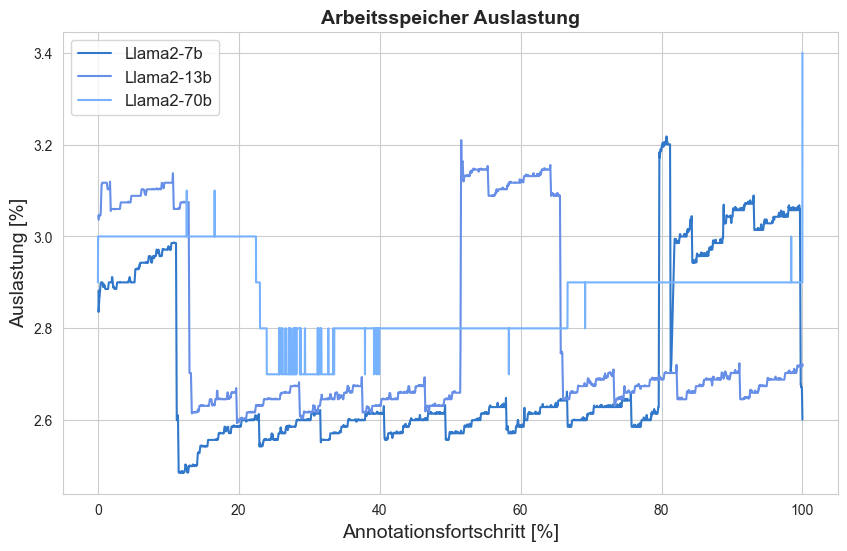

In [238]:
import matplotlib.pyplot as plt

# Set pastel colors
colors = ['#3178ca', '#678fe7', '#77b2fe']

# Create a single plot
plt.figure(figsize=(10, 6))

# Plot for 7b
memory_7['7b'].plot(color=colors[0], label='Llama2-7b')

# Plot for 13b
memory_13['13b'].plot(color=colors[1], label='Llama2-13b')

# Plot for 70b
memory_70['70b'].plot(color=colors[2], label='Llama2-70b')

# Set titles and labels
plt.title('Arbeitsspeicher Auslastung', fontsize=14, fontweight='bold')
plt.xlabel('Annotationsfortschritt [%]', fontsize=14)
plt.ylabel('Auslastung [%]', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(fontsize=12)

# Show plot
plt.show()


### Network

In [239]:
network_usage_gb = round(network_usage/1024/1024/1024, 3)
network_usage_gb

,7b_sent,7b_received,13b_sent,13b_received,70b_sent,70b_received
0,2.853,64.971,4.832,67.409,1.336,65.327
1,2.853,64.971,4.832,67.409,1.336,65.327
2,2.853,64.971,4.832,67.409,1.336,65.327
3,2.853,64.971,4.832,67.409,1.336,65.327
4,2.853,64.971,4.832,67.409,1.336,65.327
...,...,...,...,...,...,...
21567,4.809,67.384,NaN,NaN,NaN,NaN
21568,4.810,67.384,NaN,NaN,NaN,NaN
21569,4.810,67.384,NaN,NaN,NaN,NaN
21570,4.810,67.384,NaN,NaN,NaN,NaN


In [240]:
network_usage_gb.describe()

,7b_sent,7b_received,13b_sent,13b_received,70b_sent,70b_received
count,21572.000000,21572.000000,18474.000000,18474.000000,10520.000000,10520.000000
mean,3.815697,66.096565,5.818248,68.510422,1.581116,65.572952
std,0.563729,0.689313,0.582447,0.623858,0.142601,0.142972
min,2.853000,64.971000,4.832000,67.409000,1.336000,65.327000
25%,3.328000,65.510750,5.305000,67.992000,1.458000,65.450000
50%,3.809000,66.040000,5.781000,68.523000,1.581000,65.573000
75%,4.285000,66.597000,6.333750,69.051000,1.704000,65.696000
max,4.810000,67.384000,6.807000,69.564000,3.259000,67.346000


In [241]:
network_usage_down = network_usage_gb.copy()
# cpu_usage_down = cpu_usage[10:].rolling(80).mean()

network_7 = pd.DataFrame(network_usage_down[['7b_sent', '7b_received']].dropna().reset_index(drop=True))
network_13 = pd.DataFrame(network_usage_down[['13b_sent', '13b_received']].dropna().reset_index(drop=True))
network_70 = pd.DataFrame(network_usage_down[['70b_sent', '70b_received']].dropna().reset_index(drop=True))


network_7.index = network_7.index / network_7.index.max() * 100
network_13.index = network_13.index / network_13.index.max() * 100
network_70.index = network_70.index / network_70.index.max() * 100

# memory_7['mean'] = memory_7['7b'].mean()
# memory_13['mean'] = memory_13['13b'].mean()
# memory_70['mean'] = memory_70['70b'].mean()

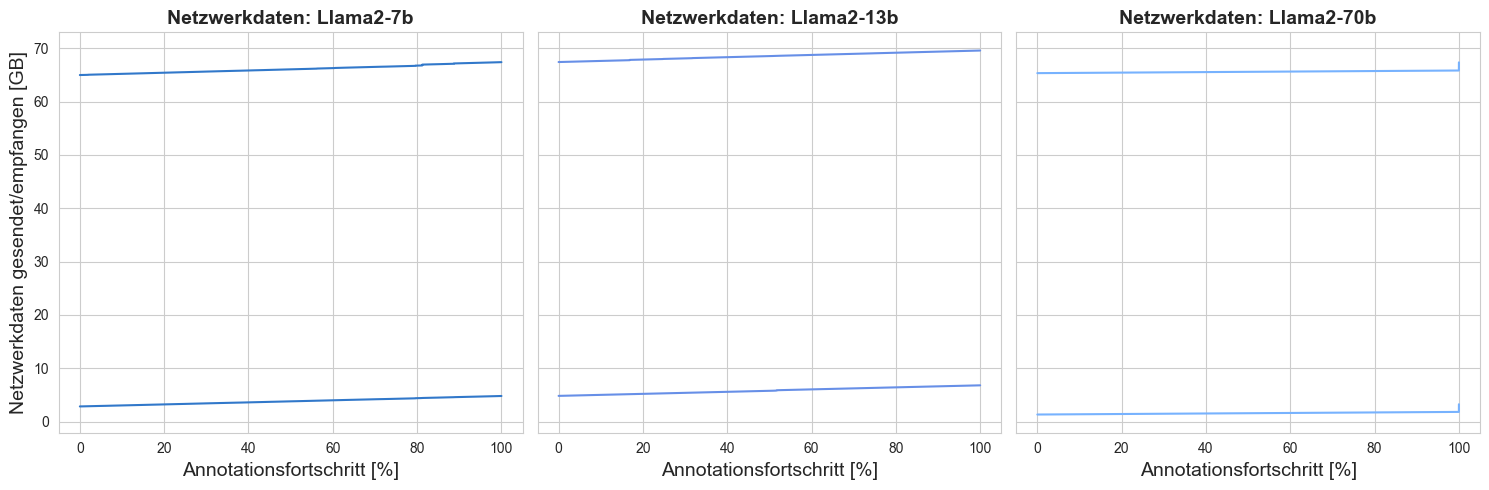

In [242]:
# Set pastel colors
colors = ['#3178ca', '#678fe7', '#77b2fe']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot for 7b
network_7['7b_sent'].plot(ax=axes[0], color=colors[0])
network_7['7b_received'].plot(ax=axes[0], color=colors[0])
# gpu_7['mean'].plot(ax=axes[0], color='red', linestyle='--', label='Mean')
axes[0].set_title('Netzwerkdaten: Llama2-7b', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Netzwerkdaten gesendet/empfangen [GB]', fontsize=14)
axes[0].set_xlabel('Annotationsfortschritt [%]', fontsize=14)
axes[0].tick_params(axis='both', which='major', labelsize=10)

# Plot for 13b
network_13['13b_sent'].plot(ax=axes[1], color=colors[1])
network_13['13b_received'].plot(ax=axes[1], color=colors[1])
# gpu_13['mean'].plot(ax=axes[1], color='red', linestyle='--', label='Mean')
axes[1].set_title('Netzwerkdaten: Llama2-13b', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Annotationsfortschritt [%]', fontsize=14)
axes[1].tick_params(axis='both', which='major', labelsize=10)

# Plot for 70b
network_70['70b_sent'].plot(ax=axes[2], color=colors[2])
network_70['70b_received'].plot(ax=axes[2], color=colors[2])
# gpu_70['mean'].plot(ax=axes[2], color='red', linestyle='--', label='Mean')
axes[2].set_title('Netzwerkdaten: Llama2-70b', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Annotationsfortschritt [%]', fontsize=14)
axes[2].tick_params(axis='both', which='major', labelsize=10)

# Adjust layout
plt.tight_layout()

plt.show()

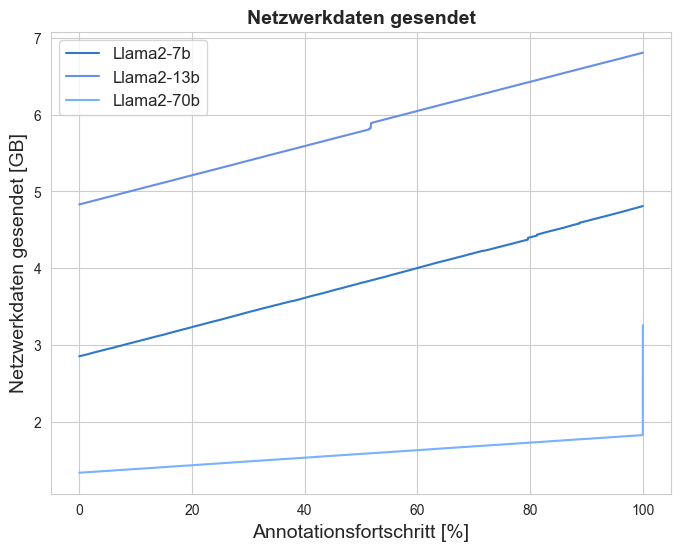

In [243]:
import matplotlib.pyplot as plt

# Set pastel colors
colors = ['#3178ca', '#678fe7', '#77b2fe']

# Plot for network_sent
plt.figure(figsize=(8, 6))
network_7['7b_sent'].plot(color=colors[0], label='Llama2-7b')
network_13['13b_sent'].plot(color=colors[1], label='Llama2-13b')
network_70['70b_sent'].plot(color=colors[2], label='Llama2-70b')
plt.title('Netzwerkdaten gesendet', fontsize=14, fontweight='bold')
plt.xlabel('Annotationsfortschritt [%]', fontsize=14)
plt.ylabel('Netzwerkdaten gesendet [GB]', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(fontsize=12)
plt.show()


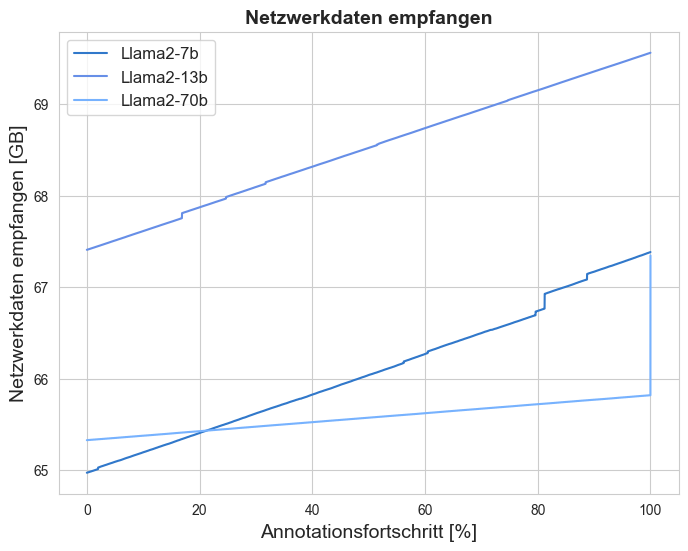

In [244]:
# Plot for network_received
plt.figure(figsize=(8, 6))
network_7['7b_received'].plot(color=colors[0], label='Llama2-7b')
network_13['13b_received'].plot(color=colors[1], label='Llama2-13b')
network_70['70b_received'].plot(color=colors[2], label='Llama2-70b')
plt.title('Netzwerkdaten empfangen', fontsize=14, fontweight='bold')
plt.xlabel('Annotationsfortschritt [%]', fontsize=14)
plt.ylabel('Netzwerkdaten empfangen [GB]', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(fontsize=12)
plt.show()